# **Data Preperation**
## In this notebook we'll prepare the data for the models with the following steps:

<br>

## 1. Data Analysis (EDA)
## 2. Data Pre-Processing (Feature engineering)
## 3. Data Splitting


## **Import libraries**

In [1]:
# ===== Packages =====
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import bootstrap
from scipy.stats import boxcox
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tqdm import tqdm
from prettytable import PrettyTable

# ===== User Defined Packages =====
import titanic_helpers as th

%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 12

sns.set_theme(style="darkgrid")


# **EDA - Exploratory Data Analysis**
## In this section:
* Loading the data and sneak peeking it
* Check what data types exist in the dataset
* Get some statistics estimators from the data
* Check for missing values
* Plot some distributions
* Check for correlation between the features and also between the features and the target

In [2]:
df = pd.read_csv('Data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## We can see there are 891 records and 12 field: 11 predictors and 1 target (Survived)
## For convience we'll move the Survived field to the right end of the table:

In [3]:
col_list = list(df.columns)
col_list[1], col_list[-1] = col_list[-1], col_list[1]
df = df.reindex(columns=col_list)

In [4]:
df.head()

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,S,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


## Some overview on the different features (just the not obvious ones):
* Embarked - Port of Embarktion (C = Cherbourg, Q = Queenstown, S = Southampton)
* Pclass - Ticket Class (1st classs, 2nd class...)
* SobSp - Number of siblings / spouses aboard the Titanic
* Parch - Number of parents / children aboard the Titanic
* Ticket - Ticket number
* Fare - The price of the ticket
* Cabin - Cabin number


## Get some info about the data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Embarked     889 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Use value counts on each feature to understand it more:

In [6]:
th.value_counts_all(df)

----------------------------------------PassengerId---------------------------------------- - 

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

----------------------------------------Embarked---------------------------------------- - 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

----------------------------------------Pclass---------------------------------------- - 

3    491
1    216
2    184
Name: Pclass, dtype: int64

----------------------------------------Name---------------------------------------- - 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnso

## Some inresting insights from value_counts (and also from df.info()):
* PassengerID gives us no information probably will be dropped.
* Embarked and Pclass are categorial variables with cardinality of 3.
* Name as it is gives us no useful information but it might be interesting to use the status (Miss, Mr) of the passengers as a new feature.
* Sex is a categorial variable with cardinality of 2.
* Age is a continuous variable with 177 null values out of 891 records.
* SibSp and Parch are categorial variables with cardinality of 7.
* For now it seems Ticket gives us no useful information (needs to be checked more thoroughly).
* Fare is a continuous variable.
* Cabin has 684 missing values and also has many different bins (and I'm sure there are many more unkowns bins to us), so might be dropped.
* Survived is a categorial variable with cardinality of 2.



## **Plot features and target distributions:**

### Plot Pr(Surveived) and countplot of survived

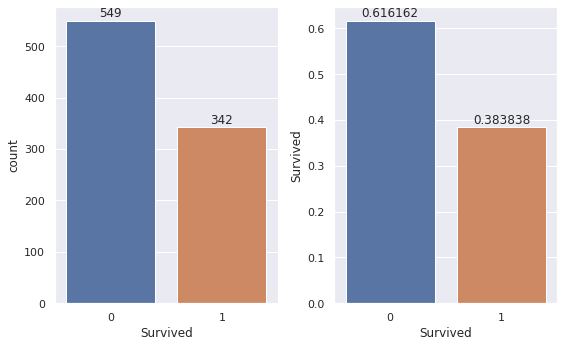

In [7]:
#titanic = sns.load_dataset("titanic")
fig = plt.figure(figsize=(8.,5.))
ax = fig.add_subplot(1,2,1)
ax = sns.countplot(x="Survived", data=df)
ax.bar_label(ax.containers[0], padding=1)

ax = fig.add_subplot(1,2,2)
ax = sns.barplot(x="Survived", y='Survived',data=df, estimator=lambda x: len(x) / len(df))
ax.bar_label(ax.containers[0], padding=1)

fig.tight_layout()

### We can see that the data is pretty balanced

### **Plot the categorial features: (Embarked, Pclass, Sex, SibSp, Parch)**
* Counts for each feature for detecting rare labels and biased features
* Barplot for the ditribution Pr(Survived|Feature)

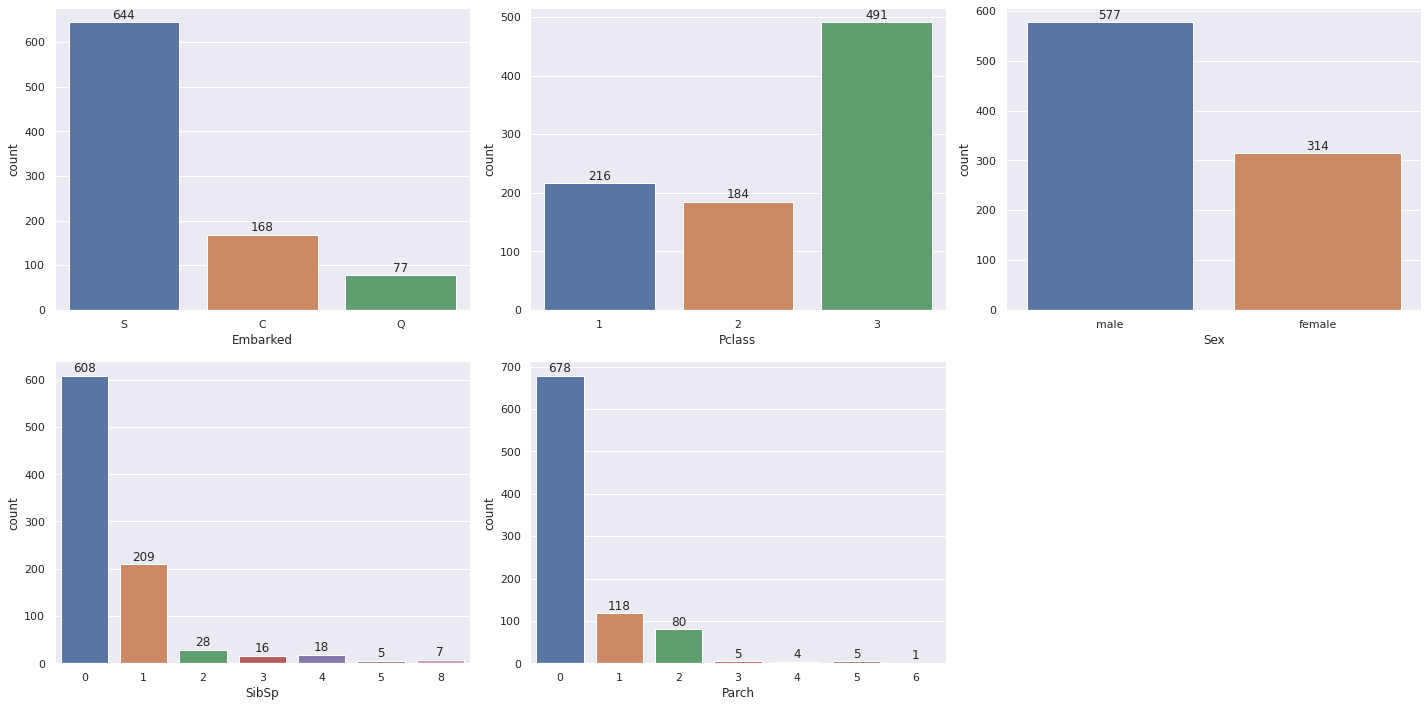

In [8]:
cols_to_plot = ['Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch']
fig = plt.figure(figsize=(20.,10.))
for i, col in enumerate(cols_to_plot):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.countplot(x=col,data=df)
    ax.bar_label(ax.containers[0], padding=1)
    
    
fig.tight_layout()

## Pr(survived|feature):

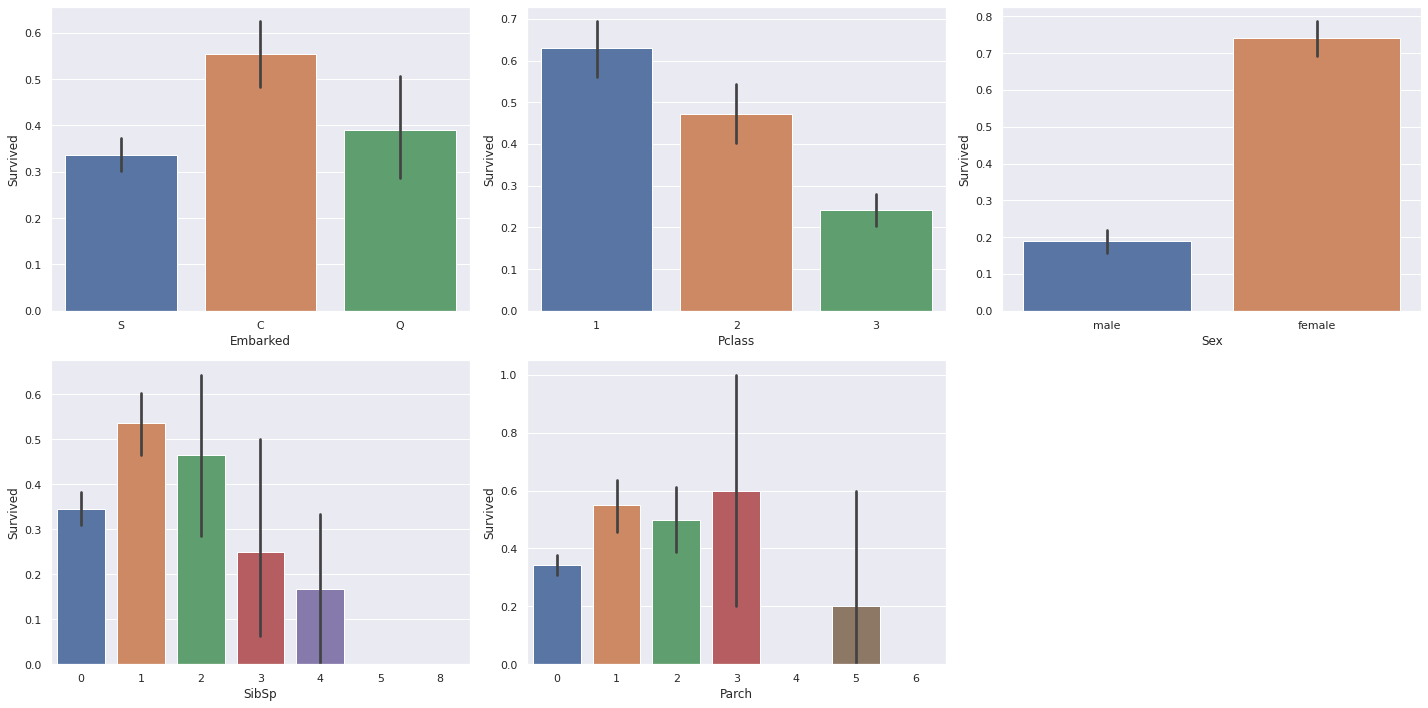

In [9]:
cols_to_plot = ['Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch']
fig = plt.figure(figsize=(20.,10.))
for i, col in enumerate(cols_to_plot):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.barplot(x=col, y='Survived',data=df)
    
    
fig.tight_layout()


## Some interesting insights:
* people who embarked from Cherbourg are more likely to survive then people who embarked from Queenstown and Southampton
* the higher the pclass the higher the survival rate
* female survival rate was higher than male (I guess the men let the women escape first) 
* about Sibsp and Parch: it seems that if you didnt have family at all in the boat or had too many family members then you are likely to not survive. (no family = no help, too many family members = too many people to help to)

## From the distributions it seems that all those features are very informative and that they should contribute to the classification

## **Plot the continues variables distributions:**
* NOTE: the age column is preimputed. after imputation we will plot the distribution again and compare to this one to make sure we did not change the distribution.

+---------+-------+--------------------------------------------------------------------+--------+-------------------------------------------------------+
| Feature |  Mean |                           Mean CI (95%)                            | Median |                    Median CI (95%)                    |
+---------+-------+--------------------------------------------------------------------+--------+-------------------------------------------------------+
|   Age   | 29.70 | ConfidenceInterval(low=28.61694117647058, high=30.796449579831926) | 28.00  | ConfidenceInterval(low=26.975000000000364, high=29.0) |
|   Fare  | 32.20 | ConfidenceInterval(low=28.69613137485971, high=35.38380357463524)  | 14.45  |     ConfidenceInterval(low=13.3584, high=15.9084)     |
+---------+-------+--------------------------------------------------------------------+--------+-------------------------------------------------------+


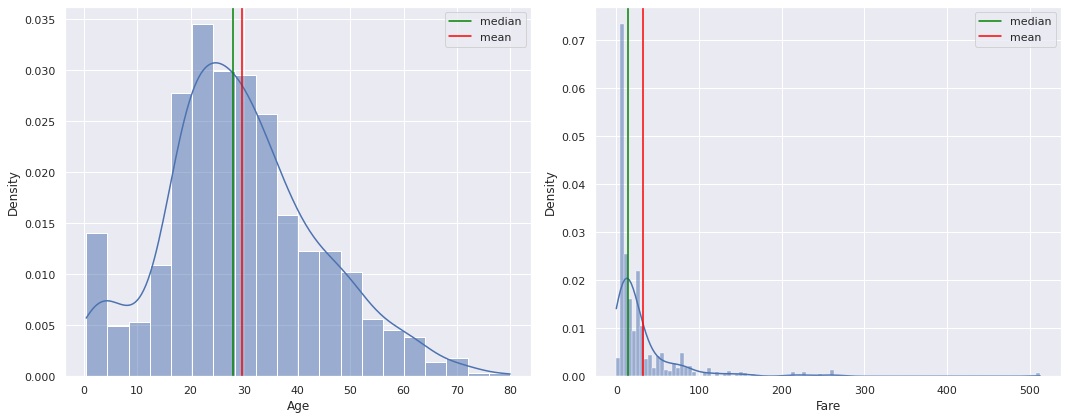

In [10]:
# Plot the age distribution
fig,ax = plt.subplots(1,2,figsize=(15, 6))
sns.histplot(data=df, x='Age', kde=True, stat='density', ax=ax[0])
age_mean = df['Age'].mean()
age_median = df['Age'].median()
ax[0].axvline(x=age_median, color='green', label='median')
ax[0].axvline(x=age_mean, color='red', label='mean')
ax[0].legend()

sns.histplot(data=df, x='Fare', kde=True, stat='density', ax=ax[1])
fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()
ax[1].axvline(x=fare_median, color='green', label='median')
ax[1].axvline(x=fare_mean, color='red', label='mean')
ax[1].legend()

fig.tight_layout()

# Print the mean, median, and CIs (using bootstrap) of each feature:
age_data = df[~df['Age'].isnull()]['Age'].values
fare_data = df['Fare'].values

ci_mean_age = bootstrap((age_data,), np.mean, confidence_level=0.95, method='basic')
ci_median_age = bootstrap((age_data,), np.median, confidence_level=0.95, method='basic')

ci_mean_fare = bootstrap((fare_data,), np.mean, confidence_level=0.95, method='basic')
ci_median_fare = bootstrap((fare_data,), np.median, confidence_level=0.95, method='basic')

statistics_table = PrettyTable(float_format='.2', field_names = ['Feature', 'Mean', 'Mean CI (95%)', 'Median', 'Median CI (95%)'])
statistics_table.add_row(['Age', age_mean, ci_mean_age.confidence_interval,age_median, ci_median_age.confidence_interval])
statistics_table.add_row(['Fare', fare_mean, ci_mean_fare.confidence_interval,fare_median, ci_median_fare.confidence_interval])
print(statistics_table)

## insights:
## Age:
* most of the passengers are around the age of 30
* the distribution seems to be unskewed (the median and mean are almost the same)

## Fare:
* the fare distribution seemes to be right skewed, we will have to deal with it later so it wont harm our models performance (especially the linear models) - maybe transform the data

## Plot Pr(Survived|Age) and Pr(not Survived|Age):

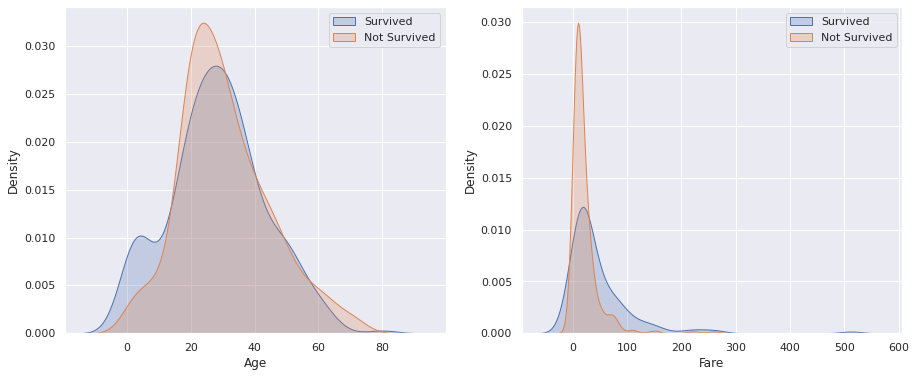

In [11]:
survived = df[df['Survived']==1]
not_survived = df[df['Survived']==0]

fig,ax = plt.subplots(1,2,figsize=(15, 6))
sns.kdeplot(data=survived, x='Age', fill=True,ax=ax[0], label='Survived')
sns.kdeplot(data=not_survived, x='Age', fill=True,ax=ax[0], label='Not Survived')
ax[0].legend()

sns.kdeplot(data=survived, x='Fare', fill=True, ax=ax[1], label='Survived')
sns.kdeplot(data=not_survived, x='Fare', fill=True, ax=ax[1], label='Not Survived')
ax[1].legend()


## **Insights**:
## Age:
* the young people (about 16 - 30) were less likely to survive, probably they let the children and the elderly escape first.
* also the old people (about 60 - 80) were less likely to survive

## Fare:
* the passengers who paid more were more likely to survive. 
It's correlated with that the people from the 1st class are more likely to survive. (maybe the fare feature does not give us more information, we will check this when we will check the correlation between the different features)

## We can also see that both graphs have a clear splitting point - Age: about 16, Fare: about 50 - so these 2 variables might have high importance in Decision Trees based algorithms.

## **Correlation between features (also between features and target):** high correlated features are no good for linear models since the models will not be able to infer the feature importance. for example, if we have the model: Y = w1 * X1 + w2 * X2 and X1 and X2 are correlated then increase in X1 will cause an increase in X2, so we would not be able to see each feature's influence on Y.

<AxesSubplot:>

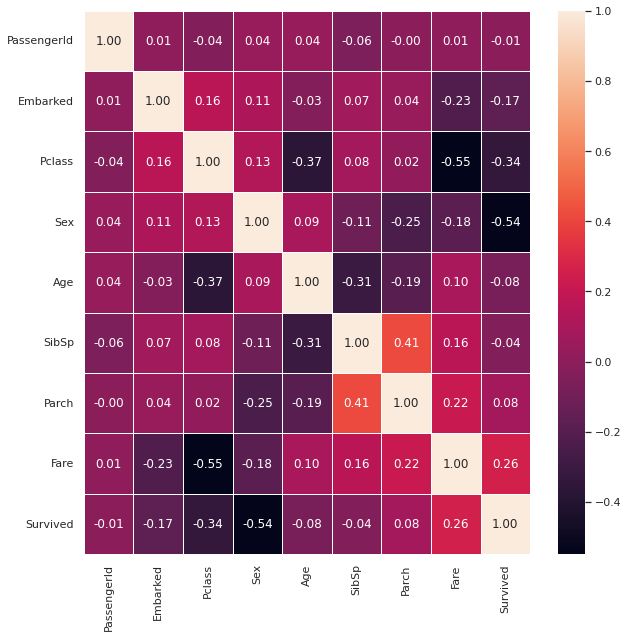

In [12]:
# First we will label the sex and embarked categories (pd.corr ignores not numeric categorial variables)
corr_df = df.copy(deep=True)
corr_df['Sex'] = corr_df['Sex'].map({'male':1, 'female':0})
corr_df['Embarked'] = corr_df['Embarked'].map({'C':0, 'Q':1, 'S':2})



fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.heatmap(corr_df.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax)


## Sort features according to correlation: (take top 10)

In [13]:
corr = corr_df.corr()
# Take only the down traingle without the diagonal (correlation mactrix is symetric) 
# and take absolute value (we dont care about the direction of the correlation, only magnitude)
corr.loc[:,:] = np.abs(np.tril(corr.values, k=-1)) 
corr.unstack().sort_values(ascending=False)[:10]

Pclass    Fare        0.549500
Sex       Survived    0.543351
SibSp     Parch       0.414838
Pclass    Age         0.369226
          Survived    0.338481
Age       SibSp       0.308247
Fare      Survived    0.257307
Sex       Parch       0.245489
Embarked  Fare        0.226311
Parch     Fare        0.216225
dtype: float64

## insights:
* there is no multicolinearity problem in the data (no correlation higher than 0.7)
* we can use the high correlation between Pclass and Fare for imputing the missing data in Fare


# **Feature Engineering** (Data Pre-processing)
## In this section we'll do:
* data imputation
* deteting outliers
* drop features
* create new features (like from the titles of the names)
* encoding categorial variables
* Feature scaling

## NOTE: we won't use binnig since it can cause information loss. it's recommended to use binnig when the categories are obvious (for example: blood pressure - the values for high, medium, and low blood pressure are known)

## **Data Imputation**
## There are 3 cases of missing data:
1. Missing Completly At Random (MCAR): the missing data has nothing to do with the sample taken (example: the person who registered the samples forgot to write the age of the tested person)  
2. Missing At Random (MAR): the missingness can be explained by other variables but not by the variable itself. It's not a testable assumption, but there are cases where it is reasonable vs. not.
3. Missing Not At Random (MNAR): the missing value is dependent on the value of the missing value itself - Pr(y is missing | the value of y). in this case the value of y need to be picked carefully so y will not be heavily biased. Example: Obese people are likely not to disclose their weight.

NOTES:
1. in this project we'll assume the data is MAR
2. we'll check for missing values in train and test sets. the test will be imputed accrding to the method used in the training set to avoid overfitting.




## First we'll check for missing values in the training set and test set:

In [14]:
# Load the test set
df_test = pd.read_csv('Data/test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
# Check for missing values
th.missing_values_table(df, df_test)

+-------------+-------------------------+------------------------+
|   Feature   | Missing values in train | Missing values in test |
+-------------+-------------------------+------------------------+
| PassengerId |            0            |           0            |
|    Pclass   |            0            |           0            |
|     Name    |            0            |           0            |
|     Sex     |            0            |           0            |
|     Age     |           177           |           86           |
|    SibSp    |            0            |           0            |
|    Parch    |            0            |           0            |
|    Ticket   |            0            |           0            |
|     Fare    |            0            |           1            |
|    Cabin    |           687           |          327           |
|   Embarked  |            2            |           0            |
|   Survived  |            0            |     feature is NA   

## As we can see there are 4 features with missing values: Age, Fare, Cabin, Embarked


## **Fare Imputation**: 

## there is only 1 missing value (only at the test set) so the method we'll use wont impact much the distribution. of course we dont want to impute it with a value that will cause this sample to be an outlier so we'll just use the median for imputing. 
## There is also an high correlation between Fare and Pclass (-0.55: the higher the fare the lower the class number), so we can use it: we''ll take the median of the fare of the subgroup of the passengers with the same class as the sample with the missing value.

## Note: we're using median instead of mean because the median is more imune to ouliers than mean.

In [16]:
# Get the the sample with the missing value:
missing_value_sample = df_test[df_test['Fare'].isnull()]
# Get the Pclass:
Pclass = missing_value_sample['Pclass']
# Calculate the median of the subgroup and then impute the missing data with it:
median = df[df['Pclass']==int(Pclass)]['Fare'].median()
df_test.loc[df_test['Fare'].isnull().values, 'Fare'] = median

## **Embarked imputation**: 

## there are only 2 missing values, so as we did with fare, we'll just use some statistic estimator for imputing. Embarked is a categorial variable so we'll just might use the mode - the most frequent value.

## From the correlation matrix it seems there is some correlation between Embarked and Pclass. Lets check it on a graph: 


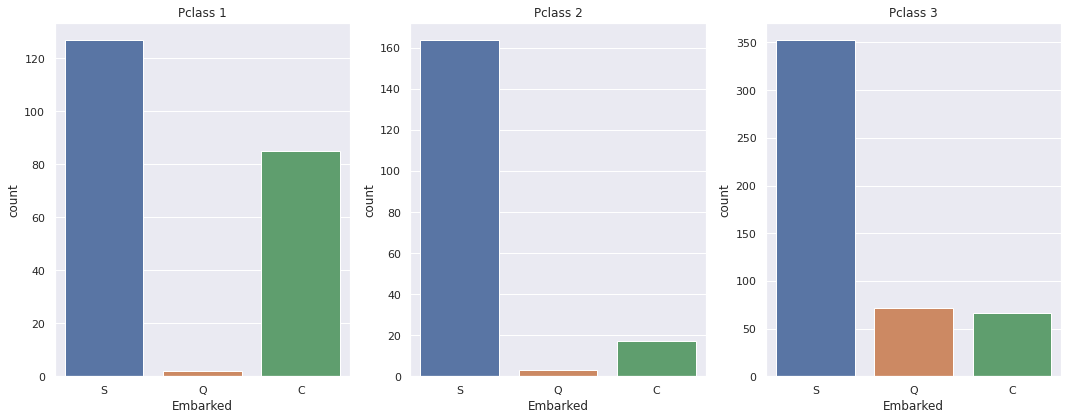

In [17]:
class_groups = df.groupby(by=['Pclass'])

fig,axes = plt.subplots(1,3, figsize=(15, 6))
for i, ax in enumerate(axes):
    sns.countplot(x='Embarked', data = class_groups.get_group(i+1), order=['S', 'Q', 'C'],ax=ax)
    ax.set_title(f'Pclass {i+1}')

fig.tight_layout()

In [18]:
# now lets take a look at the samples with the missing values:
df[df['Embarked'].isnull()]


,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
61,62,NaN,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,1
829,830,NaN,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,1


## They are both from Pclass so it most likely that they embarked from S or from C. we'll try to determine from where according to the fare which equals to 80 for both samples (there's also high correlation between embarked and fair):

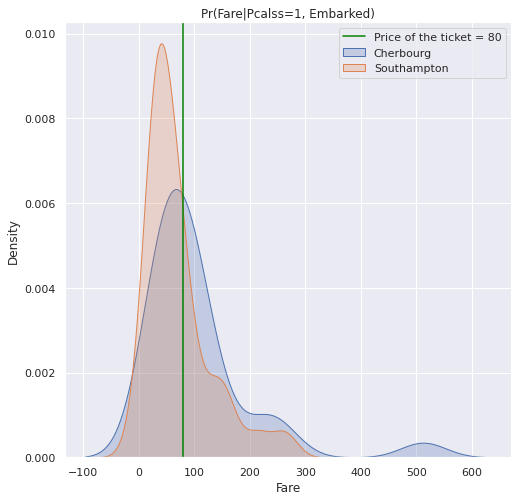

In [19]:
embarked_groups = class_groups.get_group(1).groupby(['Embarked'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
sns.kdeplot(data=embarked_groups.get_group('C'), x='Fare', fill=True, ax=ax, label='Cherbourg')
sns.kdeplot(data=embarked_groups.get_group('S'), x='Fare', fill=True, ax=ax, label='Southampton' )
ax.axvline(x=80.0, color='green', label='Price of the ticket = 80')
ax.set_title('Pr(Fare|Pcalss=1, Embarked)')
ax.legend()

## As we can see we cant determine from where the passengers embarked (Southampton or Cherbourg) because at the value of 80 the distributions intersect. So we'll just impute one of them as S and the other as C:

In [20]:
df.loc[61, 'Embarked'] = 'S'
df.loc[829, 'Embarked'] = 'C'

In [21]:
df[df['Embarked'].isnull()]

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived


## **Cabin Imputation**:

## Seems there are too many missing values in Cabin. We'll check the precentage of the missing values and if it's too high we'll just remove the feature.

In [22]:
num_of_missing_vals = len(df[df['Cabin'].isnull()])
df_len = len(df)
percentage = (num_of_missing_vals/df_len) * 100

print(f"The precentage of the missing values in Cabin:{percentage:.3f}")

The precentage of the missing values in Cabin:77.104


## 77% seems to be very high. for now we'll drop the feature, but we will get back to it later and try to extract something usefull from the feature. (maybe Knn imputer will do the job?)

In [23]:
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)
df

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
4,5,S,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0
887,888,S,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0
889,890,C,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1


## **Age Imputation**:

## The training set has 177 missing values and the test set has 86 missing values. We can use features that are correlated to age to try and predict the imputation (Parch and Pclass are high correlated to age), but in some way it's like binning because it will make us use median of small number of subgroups. 
## This will cause loss of information and overfitting and we would like to avoid it.
## We'll use a more sophisticated method: **Knn imputer** which imputes missing values acording to the mean value of the n_neighbours.

In [24]:
df_for_plot = df.copy(deep=True)
df_impute = df.copy(deep=True)

# remove Ticket feature (probably will be removed in feature selection section) and name column (for now it's not usefull) and passengerID
df_impute.drop(['Ticket', 'Name', 'PassengerId', 'Survived'], axis=1, inplace=True)

# Knn cant handle text data values so we'll have to one-hot-encode the Embarked and Sex columns
cat_variables = df_impute[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True) # drop redundant column to avoid the Dummy variable trap

# replace the original columns with the dummy ones
df_impute.drop(['Sex', 'Embarked'], axis=1, inplace=True)
df_impute = pd.concat([df_impute, cat_dummies], axis=1)

# Knn algorithm is based on Eucledian distance so it requiers us to normalize our data:
scaler = MinMaxScaler()
df_impute = pd.DataFrame(scaler.fit_transform(df_impute), columns=df_impute.columns)

# Impute:
imputer = KNNImputer(n_neighbors=5)
trained_imputer = imputer.fit(df_impute)
df_impute = pd.DataFrame(trained_imputer.transform(df_impute), columns=df_impute.columns)

# return to not normalized values:
df_impute = pd.DataFrame(scaler.inverse_transform(df_impute), columns=df_impute.columns)

# copy the Age column to the original dataframe:
df['Age'] = df_impute['Age']

## Now that we are done with the Age imputing we would like to check if we didnt harm the distribution of the Age feature:

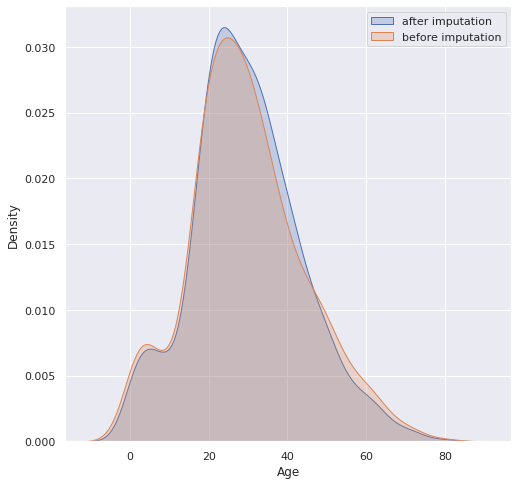

In [25]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.kdeplot(x='Age', data=df, fill=True, ax=ax, linewidth=1, label='after imputation')
sns.kdeplot(x='Age', data=df_for_plot, fill=True, ax=ax, linewidth=1, linestyle='-',label='before imputation')
ax.legend()


## As we can see the distibution was pretty much kept 

## Now we'll use the trained Imputer on the test data

In [26]:
df_for_plot = df_test.copy(deep=True)
df_impute = df_test.copy(deep=True)

# remove Ticket feature (probably will be removed in feature selection section) and name column (for now it's not usefull) and passengerID
df_impute.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Knn cant handle text data values so we'll have to one-hot-encode the Embarked and Sex columns
cat_variables = df_impute[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True) # drop redundant column to avoid the Dummy variable trap

# replace the original columns with the dummy ones
df_impute.drop(['Sex', 'Embarked'], axis=1, inplace=True)
df_impute = pd.concat([df_impute, cat_dummies], axis=1)

# Knn algorithm is based on Eucledian distance so it requiers us to normalize our data:
scaler = MinMaxScaler()
df_impute = pd.DataFrame(scaler.fit_transform(df_impute), columns=df_impute.columns)

# Impute:
df_impute = pd.DataFrame(trained_imputer.transform(df_impute), columns=df_impute.columns)

# return to not normalized values:
df_impute = pd.DataFrame(scaler.inverse_transform(df_impute), columns=df_impute.columns)

# copy the Age column to the original dataframe:
df_test['Age'] = df_impute['Age']

## Compare distributions

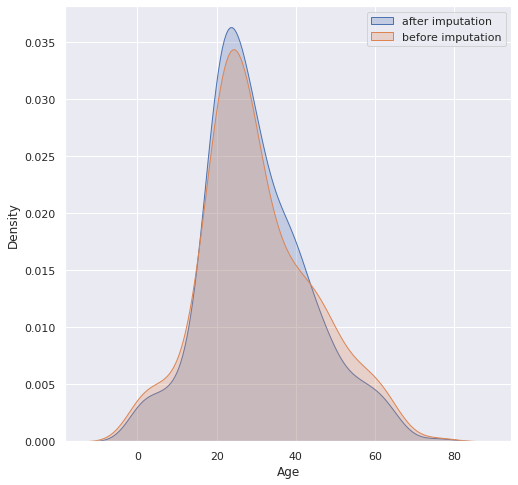

In [27]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.kdeplot(x='Age', data=df_test, fill=True, ax=ax, linewidth=1, label='after imputation')
sns.kdeplot(x='Age', data=df_for_plot, fill=True, ax=ax, linewidth=1, linestyle='-',label='before imputation')
ax.legend()

## The distribution was pretty much kept

## Check if all data is imputed:

In [28]:
th.missing_values_table(df, df_test)

+-------------+-------------------------+------------------------+
|   Feature   | Missing values in train | Missing values in test |
+-------------+-------------------------+------------------------+
| PassengerId |            0            |           0            |
|    Pclass   |            0            |           0            |
|     Name    |            0            |           0            |
|     Sex     |            0            |           0            |
|     Age     |            0            |           0            |
|    SibSp    |            0            |           0            |
|    Parch    |            0            |           0            |
|    Ticket   |            0            |           0            |
|     Fare    |            0            |           0            |
|   Embarked  |            0            |           0            |
|   Survived  |            0            |     feature is NA      |
+-------------+-------------------------+---------------------

## **All data is imputed!**

## **Outliers:**

## First we'll detect outliers in the continuous features (Age and Fare), using the concept of the interquartile range (IQR). With this concept we can build boxplot graphs.
## IQR is the difference between the third quartile Q3 and the first quartile Q1 and the ouliers are defined as the observations that are Below Q1-1.5xLQR or 
## above Q1+1.5xLQR


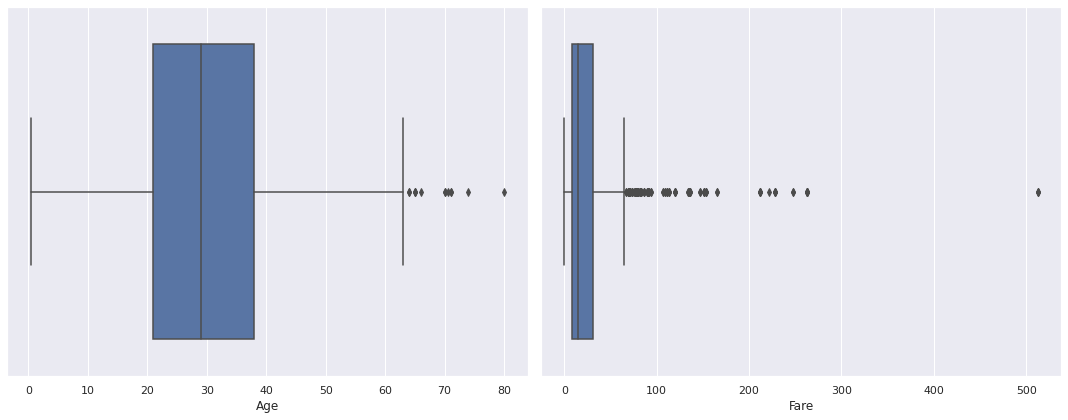

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.boxplot(x=df['Age'], ax=ax[0])
sns.boxplot(x=df['Fare'], ax=ax[1])

fig.tight_layout()

## As we can see from the boxplots, both features have outliers. In broad strokes, there are three causes for outliers:
## &nbsp;&nbsp; 1. data entry or measurement errors (for example: typos).
## &nbsp;&nbsp; 2. sampling problems and unusual coditions (sampling a subject that is not related to the investigated population).
## &nbsp;&nbsp; 3. natural variation (which I believe that most of the outliers in our data are caused from natural variation).

<br>

## If the outliers are caused from reasons 1 or 2 then the outliers should be fixed or removed, else if it caused by reason 3 then it's not smart to remove the ## outliers because they reflect the potential suprises and uncertainty in the population we investigate, even if removing it will produce a better fitting
## model or statistically significant.  
## We can deal with outliers that can not be removed with transformations, like log transform which de emphasizes ouliers by restoring symmetry to the data (I  
## believe it will be usefull with the Fare feature which has high skewness)

## **Investigate the outliers in Fare and Age:**

## Age:

In [30]:
th.detect_outliers(df, 'Age')

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Survived
33,34,S,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,0
54,55,C,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,0
96,97,C,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,0
116,117,Q,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,0
280,281,Q,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,0
438,439,S,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,0
456,457,S,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,0
493,494,C,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,0
545,546,S,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,0
630,631,S,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,1


## Seems like the outliers are caused by the natural variance of the data (it's legitimate to have people who are in the age of 80 onboard) 

## **Fare**:

## From searching the internet we found the actual ticket prices according to the classes:
## From that we can understand if the ouliers are reasonable or not

![fares](Capture.JPG)

In [31]:
sns.histplot(data=df, x='Age', kde=True, stat='density', ax=ax[0])

<AxesSubplot:xlabel='Age', ylabel='Density'>

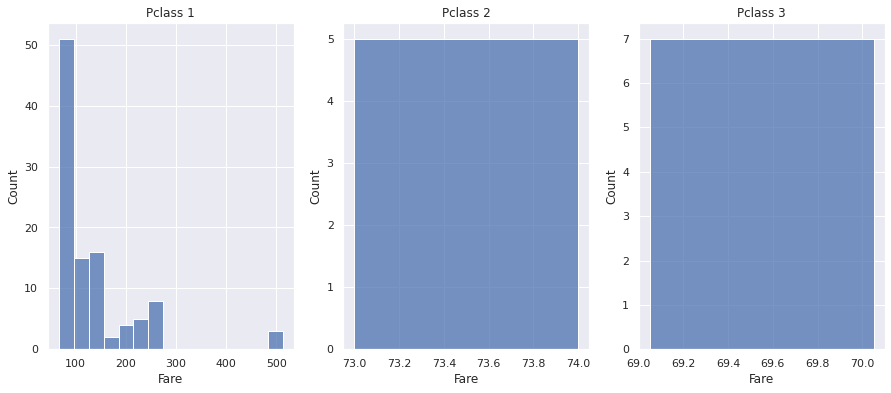

In [32]:
fare_ouliers = th.detect_outliers(df, 'Fare')

fig, axes = plt.subplots(1, 3, figsize=(15,6))
for i, ax in enumerate(axes):
    sns.histplot(data = fare_ouliers[fare_ouliers['Pclass']==i+1], x='Fare', ax=ax)
    ax.set_title(f'Pclass {i+1}')


In [33]:
fare_ouliers[fare_ouliers['Pclass']==3]

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Survived
159,160,S,3,"Sage, Master. Thomas Henry",male,7.6,8,2,CA. 2343,69.55,0
180,181,S,3,"Sage, Miss. Constance Gladys",female,8.0,8,2,CA. 2343,69.55,0
201,202,S,3,"Sage, Mr. Frederick",male,7.6,8,2,CA. 2343,69.55,0
324,325,S,3,"Sage, Mr. George John Jr",male,7.6,8,2,CA. 2343,69.55,0
792,793,S,3,"Sage, Miss. Stella Anna",female,8.0,8,2,CA. 2343,69.55,0
846,847,S,3,"Sage, Mr. Douglas Bullen",male,7.6,8,2,CA. 2343,69.55,0
863,864,S,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,8.0,8,2,CA. 2343,69.55,0


In [34]:
fare_ouliers[fare_ouliers['Pclass']==2]

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Survived
72,73,S,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,0
120,121,S,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,0
385,386,S,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,0
655,656,S,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,0
665,666,S,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,0


## Some insights:
## 1. According to the table below the ouliers in class 1 are legitimate (they are the prices range)
## 2. in class 1 and 2 the ouliers are a bit off, but from looking at another source (The Encyclopedia Titanica website), so we'll keep those values.
## 3. another wierd detail: some passengers didn't pay for the cruise (fare = 0). it must be more investigated (might be from different reasons: some kind of 
## &ensp; a lottery winning, a register mistake and so on....)

## Log tranform the Fare column for dealing with the skewnees of the feature (it will de emphasize the ouliers):

## NOTE: the fare columns contains 0 values. ln(0) = -inf. so while we dont deal with the 0 values we can not use this tranform (problem found while using standartization)

In [35]:
"""
df['Fare'] = np.log(df['Fare'])
df_test['Fare'] = np.log(df_test['Fare'])
"""

"\ndf['Fare'] = np.log(df['Fare'])\ndf_test['Fare'] = np.log(df_test['Fare'])\n"

In [36]:
"""
figure, ax = plt.subplots(1, 1, figsize=(8,8))
sns.histplot(data=df, x='Fare', kde=True, ax=ax)
"""

"\nfigure, ax = plt.subplots(1, 1, figsize=(8,8))\nsns.histplot(data=df, x='Fare', kde=True, ax=ax)\n"

## We can see that the Fare feature is less skewed now

## **Feature dropping:**


## For now we'll drop the following features:

<br>

## &nbsp;&nbsp; 1. PassengerID - it's a completely random feature
## &nbsp;&nbsp;  2. Ticket - too many different tickets, but we'll try extract usefull information from it later.
## &nbsp;&nbsp;  3. Name - each passenger has it's unique name. we'll get back to it later: we'll extract new features from the name's title (Mrs, Miss and so on...)

<br>

## Note: the Cabin feature was already dropped due too many missing values.

In [37]:
features_to_drop = ['PassengerId', 'Ticket', 'Name']
df.drop(features_to_drop, axis=1, inplace=True)
df_test.drop(features_to_drop, axis=1, inplace=True)

In [38]:
df

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,S,3,male,22.0,1,0,7.2500,0
1,C,1,female,38.0,1,0,71.2833,1
2,S,3,female,26.0,0,0,7.9250,1
3,S,1,female,35.0,1,0,53.1000,1
4,S,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,S,2,male,27.0,0,0,13.0000,0
887,S,1,female,19.0,0,0,30.0000,1
888,S,3,female,20.0,1,2,23.4500,0
889,C,1,male,26.0,0,0,30.0000,1


## **Encoding**:

## There are 3 common methods for categorial encoding (there are more than 3 methods):

<br>

## 1. ordered label encoding
## 2. one hot encoding
## 3. dummy variable encoding

<br>

## We need to encode the Embarked and Sex features. 
## Both of them are not ordinal, so we won't use ordinal labeling (we dont want the model to infer that male > female).
## We'll use dummy variable encoding, which is one hot encoding with dropping the C-1 labeling (Where C is the number of options for the category).
## This way there is not redundancy and we prevent the multicollinearity problem (when encoding all the options it's possible to predict one of the variables by
## the other variables).


In [39]:
labels = ['Embarked','Sex']
df = th.encoding(df, labels)
df_test = th.encoding(df_test, labels)
df


,Pclass,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S,Sex_male
0,3,22.0,1,0,7.2500,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,1,0
3,1,35.0,1,0,53.1000,1,0,1,0
4,3,35.0,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,1
887,1,19.0,0,0,30.0000,1,0,1,0
888,3,20.0,1,2,23.4500,0,0,1,0
889,1,26.0,0,0,30.0000,1,0,0,1


## **Features Scaling:**

## Feature scaling is important for several reasons:

<br>

## 1. The scale of the feature directrly influence the regression coefficient.
## 2. Features with more significant magnitude dominate over the ones with a smaller magnitude range.
## 3. Gradient descent converge faster (standartization makes the cost function's counters to be circles and this way the the gradient points to the minima => 
## &nbsp;&nbsp;&nbsp;&nbsp; easier trajectory towards the minima)
## 4. distace based algorithms like KNN and svm are sensetive to the feature magnitude.

## We'll use the standartization method: 
## $$x = \frac{x-mean(x)}{std(x)}$$ 
## Note: normal distributed featuers will tranform to N~(0,1)

## First we need to split the data. We dont want to scale all the data together, we want to fit the scaler on the training data and then use it on the test data.
## Training the scaler on the whole data and then spliting will cause 'data leakage', meaning the test data will have information about the distribution of
## the training data, which might end up in overfitting the data.  

<br>

## We'll split the data to 90% training, 10% test (when we'll also use validation when we'll start modeling).
## Because the data is pretty small i'd like to have a the training set as big as possible
## We'll use starified sampling: this sampling method involves dividing the entire population into homogeneous groups called strata. A random sample from each 
## stratum is taken in a number proportional to the stratum's size when compared to the population. in our case we have 2 stratums: survived and not survived.
## This way the train, and test sets will have pretty much the same distribution of the target label (Pr(Survived)).

In [51]:
X_train, y_train, X_test, y_test = th.data_split(df ,n_splits=1, test_size=0.2, train_size=0.8)

In [52]:
# Scaling the training data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Scaling the kaggle test data
df_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

## NOTE: Should the categorial variables be scaled??

In [53]:
X_train.to_pickle('prepared_data/X_train.pkl')
y_train.to_pickle('prepared_data/y_train.pkl')

X_test.to_pickle('prepared_data/X_test.pkl')
y_test.to_pickle('prepared_data/y_test.pkl')

df_test.to_pickle('prepared_data/df_test_kaggle.pkl')